
# Script Title: Combine_Meta_Ngram_Data_Into_Visual.ipynb
# Author: Rudy Venguswamy
# Date: August 13, 2019

## Purpose
The goal of this script is to take in a file that contains metadata about every article and a file that contains all the n-gram counts of each article and turns this into a visual about trends in language over time. It joins the two files together on an article ID, and cleans them to remove article's who's metadata suggests the article is from before 1970 or after 2020. These errors could have occurred due to manual data entry errors by journal authors.

Two cells down below you can see what each table contains in terms of data.

In [1]:
!pip install tables

In [2]:
#Read in data
import pandas as pd
import os
# !pip install tables
# os.chdir('/home/jovyan/work/Computational-Analysis-For-Social-Science/Dictionary Mapping/N-Gram')
metadata = pd.read_hdf('/home/jovyan/work/zekaifan/Dictionary Mapping/Pipe/metadata_combined.h5') #contains the metadata about each article
# os.chdir('/home/jovyan/work/zekaifan/ngram_results/')
ngram = pd.read_hdf('/home/jovyan/work/zekaifan/ngram_results/ngram_combined.h5') #contains the n-gram counts for each article
lang = pd.read_hdf('/home/jovyan/work/zekaifan/lang_combined.h5')

In [3]:
#properly formats the ngram table for the join on file_name
# ngram = ngram.reset_index()
ngram.head()

,ngram_1_count,culture_1_count,demographic_1_count,relational_1_count,ngram_2_count,culture_2_count,demographic_2_count,relational_2_count,ngram_3_count,culture_3_count,demographic_3_count,relational_3_count
file_name,,,,,,,,,,,,
journal-article-10.2307_40988397,7780.0,0.0,8.0,0.0,7779.0,0.0,0.0,0.0,7778.0,0.0,0.0,0.0
journal-article-10.2307_2524503,986.0,0.0,5.0,7.0,985.0,0.0,0.0,0.0,984.0,0.0,0.0,0.0
journal-article-10.2307_41959136,10128.0,3.0,0.0,3.0,10127.0,0.0,0.0,0.0,10126.0,0.0,0.0,0.0
journal-article-10.2307_2580647,453.0,4.0,3.0,10.0,452.0,0.0,0.0,0.0,451.0,0.0,0.0,0.0
journal-article-10.2307_42870525,638.0,0.0,0.0,0.0,637.0,0.0,0.0,0.0,636.0,0.0,0.0,0.0


In [4]:
ngram = ngram.fillna(0)

In [5]:
#Here's how this data frame looks
metadata.head()

,type,journal_id,journal_title,issn,article_id,article_name,given_names,surname,day,month,...,issue,issue_id,fpage,lpage,jstor_url,abstract,given-names,string-name,custom_meta_value,primary_subject
file_name,,,,,,,,,,,,,,,,,,,,,
journal-article-10.2307_4167860,research-article,j101346,Language in Society,14698013,4167860,Cross-Dialectal Variation in Arabic: Competing...,None,None,1,9,...,5,i393685,145,367,https://www.jstor.org/stable/4167860,Most researchers of Arabic sociolinguistics as...,None,Hassan R. Abd-El-Jawad,eng,Other
journal-article-10.2307_2578336,book-review,j100364,Social Forces,15347605,10.2307/2578336,None,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Prell,1,12,...,2,i344328,561,562,https://www.jstor.org/stable/2578336,None,Riv-Ellen,\n,eng,Sociology
journal-article-10.2307_2654760,book-review,j100496,Contemporary Sociology,19398638,2654760,None,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Burger,1,1,...,1,i325481,109,110,https://www.jstor.org/stable/2654760,None,Thomas,\n,eng,Sociology
journal-article-10.2307_43242281,misc,j50016579,Corporate Knights,17032016,43242281,editor's note: A KNIGHT'S TALE,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",Heaps,1,4,...,3,i40127498,6,6,https://www.jstor.org/stable/43242281,None,Toby A. A.,\n,eng,Other
journal-article-10.2307_42862018,book-review,j50010312,Social Science Quarterly,15406237,42862018,None,"[Sidney, Hyman P., Riv-Ellen, Stephen, Thomas,...",COSER,1,12,...,4,i40108834,1004,1004,https://www.jstor.org/stable/42862018,None,Lewis A.,\n,eng,Sociology


In [6]:
print('Num articles in ngram file: ',len(ngram))
print('Num articles in metadata file: ',len(metadata)) # Includes only articles belonging to the journals in the list.

Num articles in ngram file:  398703
Num articles in metadata file:  238501


In [7]:
print('DF metadata columns: ', ngram.columns)
print('DF ngram columns: ', metadata.columns)

DF metadata columns:  Index(['ngram_1_count', 'culture_1_count', 'demographic_1_count',
       'relational_1_count', 'ngram_2_count', 'culture_2_count',
       'demographic_2_count', 'relational_2_count', 'ngram_3_count',
       'culture_3_count', 'demographic_3_count', 'relational_3_count'],
      dtype='object')
DF ngram columns:  Index(['type', 'journal_id', 'journal_title', 'issn', 'article_id',
       'article_name', 'given_names', 'surname', 'day', 'month', 'year',
       'volume', 'issue', 'issue_id', 'fpage', 'lpage', 'jstor_url',
       'abstract', 'given-names', 'string-name', 'custom_meta_value',
       'primary_subject'],
      dtype='object')


Now we know the columns in each file, we can merge on 'file_name' to create a new dataframe that contains the n-gram counts as well as the year in which an article is published

In [8]:
dfnew = ngram.merge(metadata, on='file_name')
#one df contains the ngram counts, the other, merged_new, has the metadata
dfnew['year'].unique()
#how many years are there in total?

array(['1995', '2000', '1999', '1902', '1980', '2009', '1989', '1991',
       '1978', '2014', '1986', '1983', '1987', '1979', '1985', '2005',
       '1990', '1977', '2013', '1994', '2008', '2007', '1981', '1948',
       '1996', '2010', '2002', '1982', '2006', '2012', '2011', '1988',
       '1997', '1976', '1970', '1971', '1992', '2001', '1968', '1998',
       '2004', '1993', '1975', '1969', '1958', '1965', '1972', '1974',
       '1907', '1950', '1984', '2003', '1941', '2015', '1961', '1973',
       '1963', '2016', '1936', '1962', '1967', '1960', '1954', '1964',
       '1932', '1959', '1911', '1966', '2017', '2018', '1917', '1953',
       '1955', '1952', '1956', '1939', '1923', '1903', '1930', '1937',
       '1934', '1946', '1944', '1928', '1949', '1957', '1951', '1779',
       '1832', '1927', '1912', '1765', '1897', '1919', '1947', '1910',
       '1869', '1918', '1942', '1933', '1909', '1931', '1929', '1943',
       '1938', '1858', '1883', '1908', '1940', '1896', '1845', '1922',
      

In [9]:
#this is the merged dataframe combining metadata for a journal with its ngram counts
dfnew.head()

,ngram_1_count,culture_1_count,demographic_1_count,relational_1_count,ngram_2_count,culture_2_count,demographic_2_count,relational_2_count,ngram_3_count,culture_3_count,...,issue,issue_id,fpage,lpage,jstor_url,abstract,given-names,string-name,custom_meta_value,primary_subject
file_name,,,,,,,,,,,,,,,,,,,,,
journal-article-10.2307_2524503,986.0,0.0,5.0,7.0,985.0,0.0,0.0,0.0,984.0,0.0,...,2,i322990,366,367,https://www.jstor.org/stable/2524503,None,Barry,\n,eng,Other
journal-article-10.2307_2580647,453.0,4.0,3.0,10.0,452.0,0.0,0.0,0.0,451.0,0.0,...,1,i344361,356,357,https://www.jstor.org/stable/2580647,None,Barbara J.,\n,eng,Sociology
journal-article-10.2307_40604289,2432.0,1.0,1.0,27.0,2431.0,0.0,0.0,0.0,2430.0,0.0,...,1,i40026451,None,None,https://www.jstor.org/stable/40604289,None,None,None,eng,Management & Organizational Behavior
journal-article-10.2307_977483,2080.0,5.0,2.0,23.0,2079.0,0.0,0.0,0.0,2078.0,0.0,...,1,i240092,89,92,https://www.jstor.org/stable/977483,None,Robert,\n,eng,Other
journal-article-10.2307_270850,6429.0,8.0,132.0,8.0,6428.0,0.0,0.0,0.0,6427.0,0.0,...,None,i212004,346,211,https://www.jstor.org/stable/270850,None,James W.,\n,eng,Sociology


In [10]:
#cleaning up the years to integers, removing junk chars
#since the previous values contained letters, multiple years and likely typos, we are removing those bad characters
def clean(row):
    val = 1800
    try:
        return int(str(row['year'])[0:4])
    except:
        return val
dfnew['year'] = dfnew.apply(lambda row: clean(row), axis = 1)
dfnew['year'].unique()

array([1995, 2000, 1999, 1902, 1980, 2009, 1989, 1991, 1978, 2014, 1986,
       1983, 1987, 1979, 1985, 2005, 1990, 1977, 2013, 1994, 2008, 2007,
       1981, 1948, 1996, 2010, 2002, 1982, 2006, 2012, 2011, 1988, 1997,
       1976, 1970, 1971, 1992, 2001, 1968, 1998, 2004, 1993, 1975, 1969,
       1958, 1965, 1972, 1974, 1907, 1950, 1984, 2003, 1941, 2015, 1961,
       1973, 1963, 2016, 1936, 1962, 1967, 1960, 1954, 1964, 1932, 1959,
       1911, 1966, 2017, 2018, 1917, 1953, 1955, 1952, 1956, 1939, 1923,
       1903, 1930, 1937, 1934, 1946, 1944, 1928, 1949, 1957, 1951, 1779,
       1832, 1927, 1912, 1765, 1897, 1919, 1947, 1910, 1869, 1918, 1942,
       1933, 1909, 1931, 1929, 1943, 1938, 1858, 1883, 1908, 1940, 1896,
       1845, 1922, 1935, 1925, 1855, 1906, 1748, 1945, 1914, 1891, 1886,
       1898, 1783, 1924, 1807, 1871, 1876, 1920, 1904, 1873, 1913, 1882,
       1800, 1921, 1905, 1842, 1888, 1733, 1880, 1853, 1926, 1885, 1852,
       1892, 1894, 1792, 1859, 1860, 1915, 1751, 18

In [11]:
#It's clear we need to clean this data and remove the articles with years before or after our analysis time period
#gets dataframe for values after 1970 and before 2015
df1= dfnew[dfnew['year']>1970]
df1 = df1[df1['year']<=2015]
df1['year'].unique()

array([1995, 2000, 1999, 1980, 2009, 1989, 1991, 1978, 2014, 1986, 1983,
       1987, 1979, 1985, 2005, 1990, 1977, 2013, 1994, 2008, 2007, 1981,
       1996, 2010, 2002, 1982, 2006, 2012, 2011, 1988, 1997, 1976, 1971,
       1992, 2001, 1998, 2004, 1993, 1975, 1972, 1974, 1984, 2003, 2015,
       1973])

In [12]:
print('Filtered Dataframe Length: ', len(df1))

Filtered Dataframe Length:  224998


In [13]:
df1.columns

Index(['ngram_1_count', 'culture_1_count', 'demographic_1_count',
       'relational_1_count', 'ngram_2_count', 'culture_2_count',
       'demographic_2_count', 'relational_2_count', 'ngram_3_count',
       'culture_3_count', 'demographic_3_count', 'relational_3_count', 'type',
       'journal_id', 'journal_title', 'issn', 'article_id', 'article_name',
       'given_names', 'surname', 'day', 'month', 'year', 'volume', 'issue',
       'issue_id', 'fpage', 'lpage', 'jstor_url', 'abstract', 'given-names',
       'string-name', 'custom_meta_value', 'primary_subject'],
      dtype='object')

Now we have a big dataframe with articles, ngram counts and the years in which they were published, we need to decide how to count up the n-grams for an article.

In [14]:
#Commented out by JH on 12-03-19 - clean up denominator (don't count words three times)
#df1['Final_Culture_Count'] = (df1['culture_1_count'] + df1['culture_2_count'] + df1['culture_3_count'])/(df1['ngram_1_count']+df1['ngram_2_count']+df1['ngram_3_count'])
#df1['Final_Demographic_Count'] = (df1['demographic_1_count'] + df1['demographic_2_count'] + df1['demographic_3_count'])/(df1['ngram_1_count']+df1['ngram_2_count']+df1['ngram_3_count'])
#df1['Final_Relational_Count'] = (df1['relational_1_count'] + df1['relational_2_count'] + df1['relational_3_count'])/(df1['ngram_1_count']+df1['ngram_2_count']+df1['ngram_3_count'])

In [15]:
#How do we want to count 1gram counts vs. 2gram counts?
df1['Final_Culture_Count'] = (df1['culture_1_count'] + df1['culture_2_count'] + df1['culture_3_count'])/(df1['ngram_1_count'])
df1['Final_Demographic_Count'] = (df1['demographic_1_count'] + df1['demographic_2_count'] + df1['demographic_3_count'])/(df1['ngram_1_count'])
df1['Final_Relational_Count'] = (df1['relational_1_count'] + df1['relational_2_count'] + df1['relational_3_count'])/(df1['ngram_1_count'])

In [16]:
#filters dataframe for subjects that are sociology or Management & Organizational Behavior (i.e not Other)
df_for_subj = df1[df1['primary_subject'] != 'Other']
df_for_subj.shape

(155553, 37)

In [17]:
df_for_subj = df_for_subj[df_for_subj['type'] == 'research-article']
df_for_subj.shape

(70082, 37)

In [18]:
sociology_culture = df_for_subj[df_for_subj.primary_subject == 'Sociology'].sort_values('Final_Culture_Count')[-10:]
sociology_demographic = df_for_subj[df_for_subj.primary_subject == 'Sociology'].sort_values('Final_Demographic_Count')[-10:]
sociology_relational = df_for_subj[df_for_subj.primary_subject == 'Sociology'].sort_values('Final_Relational_Count')[-10:]
management_culture = df_for_subj[df_for_subj.primary_subject == 'Management & Organizational Behavior'].sort_values('Final_Culture_Count')[-10:]
management_demographic = df_for_subj[df_for_subj.primary_subject == 'Management & Organizational Behavior'].sort_values('Final_Demographic_Count')[-10:]
management_relational = df_for_subj[df_for_subj.primary_subject == 'Management & Organizational Behavior'].sort_values('Final_Relational_Count')[-10:]

In [19]:
# sociology_culture.to_csv('sociology_culture.csv')
# sociology_demographic.to_csv('sociology_demographic.csv')
# sociology_relational.to_csv('sociology_relational.csv')
# management_culture.to_csv('management_culture.csv')
# management_demographic.to_csv('management_demographic.csv')
# management_relational.to_csv('management_relational.csv')

In [20]:
#Once we have these final counts, we will group by year to get an average value for each count for a year and plot that!
df_for_plot = df_for_subj[['Final_Culture_Count','Final_Demographic_Count','Final_Relational_Count','year','primary_subject']]
df_for_plot = df_for_plot.groupby(['year','primary_subject']).mean()
df_for_plot.head()

Final_Culture_Count  \
year primary_subject                                             
1971 Management & Organizational Behavior             0.003917   
     Sociology                                        0.003439   
1972 Management & Organizational Behavior             0.003594   
     Sociology                                        0.003279   
1973 Management & Organizational Behavior             0.005030   

                                           Final_Demographic_Count  \
year primary_subject                                                 
1971 Management & Organizational Behavior                 0.002574   
     Sociology                                            0.002785   
1972 Management & Organizational Behavior                 0.002453   
     Sociology                                            0.002688   
1973 Management & Organizational Behavior                 0.002797   

                                           Final_Relational_Count  
year primary_subject                                               
1971 Management & Organizational Behavior                0.011317  
     Sociology                                           0.006260  
1972 Management & Organizational Behavior                0.011085  
     Sociology                                           0.006758  
1973 Management & Organizational Behavior                0.013084

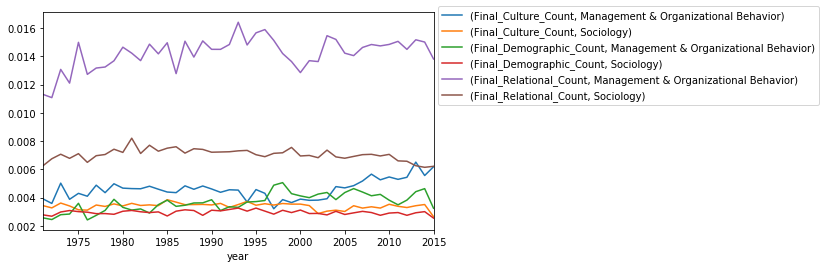

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,4))
df_for_plot.unstack().plot(ax = ax)
ax.legend(bbox_to_anchor=(2, 1.05))
plt.show()

In [22]:
#Plotted the correlation between the three types of counts: culture, demographic, relational
df_for_plot.corr()

,Final_Culture_Count,Final_Demographic_Count,Final_Relational_Count
Final_Culture_Count,1.000000,0.516134,0.794708
Final_Demographic_Count,0.516134,1.000000,0.680022
Final_Relational_Count,0.794708,0.680022,1.000000


In [23]:
# os.chdir('/home/jovyan/work/Computational-Analysis-For-Social-Science/Dictionary Mapping/Pipe')
# df_for_plot.to_csv('NgramCountbySubjectandYear.csv')

In [24]:
applied = df_for_subj.given_names.apply(lambda x: set(x) if isinstance(x, list) else {})
unioned = set.union(*applied.values)
unioned = unioned - set([None])
result = ','.join(list(unioned))
with open('given_names.txt', 'w') as f:
    f.write(result)

In [34]:
joined = df_for_subj.join(lang)
joined = joined[joined.custom_meta_value.isin(('eng', 'en', 'EN'))]

In [35]:
joined.shape

(69680, 41)

In [26]:
mismatch = joined[joined.language_1 != 'en']
mismatch.to_csv('mismatch.csv')

In [27]:
joined = joined[joined.language_1 == 'en']
joined.shape

(69659, 41)

In [28]:
joined.to_hdf('filtered.h5', 'metadata')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['type', 'journal_id', 'journal_title', 'issn', 'article_id', 'article_name', 'given_names', 'surname', 'day', 'month', 'volume', 'issue', 'issue_id', 'fpage', 'lpage', 'jstor_url', 'abstract', 'given-names', 'string-name', 'custom_meta_value', 'primary_subject', 'language_1', 'language_1_prob', 'language_2', 'language_2_prob']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [29]:
with open('filtered_index.csv', 'w') as f:
    f.write('\n'.join(joined.index))

In [30]:
joined = df_for_subj.join(lang)

In [31]:
joined[(~joined.custom_meta_value.isin(('eng', 'en', 'EN'))) & (joined.language_1 == 'en')].jstor_url.values

array(['https://www.jstor.org/stable/40226382',
       'https://www.jstor.org/stable/40227124',
       'https://www.jstor.org/stable/40226376',
       'https://www.jstor.org/stable/40226111',
       'https://www.jstor.org/stable/40226334',
       'https://www.jstor.org/stable/40227222',
       'https://www.jstor.org/stable/40226370',
       'https://www.jstor.org/stable/40226329',
       'https://www.jstor.org/stable/40227239'], dtype=object)

In [32]:
joined.columns

Index(['ngram_1_count', 'culture_1_count', 'demographic_1_count',
       'relational_1_count', 'ngram_2_count', 'culture_2_count',
       'demographic_2_count', 'relational_2_count', 'ngram_3_count',
       'culture_3_count', 'demographic_3_count', 'relational_3_count', 'type',
       'journal_id', 'journal_title', 'issn', 'article_id', 'article_name',
       'given_names', 'surname', 'day', 'month', 'year', 'volume', 'issue',
       'issue_id', 'fpage', 'lpage', 'jstor_url', 'abstract', 'given-names',
       'string-name', 'custom_meta_value', 'primary_subject',
       'Final_Culture_Count', 'Final_Demographic_Count',
       'Final_Relational_Count', 'language_1', 'language_1_prob', 'language_2',
       'language_2_prob'],
      dtype='object')

In [33]:
joined.shape

(70082, 41)